In [42]:
from parsing.parse_functions import parse_pdb_files
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D   # noqa: F401  (needed for 3-D projection)

from utils.scale_low_res_coordinates import scale_low_res_coords
from utils.pucker_data_functions import determine_pucker_data

In [43]:
input_pdb_dir = "/Users/kaisardauletbek/Documents/GitHub/RNA-Classification/data/rna2020_pruned_pdbs/"
suites = parse_pdb_files(input_pdb_dir, input_pdb_folder=input_pdb_dir)

puckers = ['c2c2', 'c2c3', 'c3c2', 'c3c3']
pucker_indices = {}
for pucker in puckers:
    indices, _ = determine_pucker_data(suites, pucker)
    pucker_indices[pucker] = indices

# -- ensure every index array is really integer-typed  -----------------
pucker_indices = {k: np.asarray(v, dtype=np.intp)    # <-- np.intp = “platform int”
                  for k, v in pucker_indices.items()}


In [44]:
pucker_indices

{'c2c2': array([  16,   17,   52,   84,  174,  179,  202,  206,  308,  309,  341,
         500,  563,  574,  599,  642,  651,  652,  666,  800,  806,  807,
         808,  831,  841,  905, 1077, 1120, 1152, 1262, 1287, 1291, 1293,
        1294, 1312, 1313, 1352, 1394, 1395, 1396, 1417, 1458, 1476, 1477,
        1521, 1522, 1524, 1547, 1548, 1549, 1550, 1572, 1601, 1602, 1603,
        1610, 1694, 1764, 1765, 1772, 1789, 1842, 1846, 1847, 1852, 1928,
        1984, 1990, 2038, 2093, 2094, 2100, 2116, 2123, 2175, 2191, 2210,
        2238, 2257, 2258, 2277, 2278, 2279, 2285, 2307, 2316, 2317, 2330,
        2332, 2336, 2342, 2403, 2404, 2410, 2442, 2443, 2491, 2503, 2504,
        2535, 2545, 2548, 2549, 2578, 2676, 2758, 2926, 2932, 2938, 2939,
        2982, 3051, 3060, 3097, 3116, 3138, 3242, 3267, 3268, 3319, 3444,
        3445, 3446, 3539, 3592, 3645, 3646, 3682, 3683, 3684, 3874, 3875,
        3888, 3909, 3919, 3930, 3958, 4131]),
 'c2c3': array([  53,   64,   75,   85,   96,  172,  177, 

In [45]:
suites[0].low_resolution_coordinates()

[4.777698713816097,
 5.237173092423049,
 65.62388562608349,
 72.88010355176152,
 20.056338853094566,
 100.71839359733033,
 -0.0020217340379483136]

In [46]:
# ---------------------------------------------------------------------------
# helpers
# ---------------------------------------------------------------------------
def spherical_to_vec(theta_deg: np.ndarray, phi_deg: np.ndarray) -> np.ndarray:
    t, p = np.radians(theta_deg), np.radians(phi_deg)
    return np.column_stack([np.sin(t) * np.cos(p),
                            np.sin(t) * np.sin(p),
                            np.cos(t)])

def arc_distance(a: np.ndarray, b: float) -> np.ndarray:
    """Shortest signed arc distance between vectors of angles a and scalar b (radians)."""
    d = (a - b + np.pi) % (2 * np.pi) - np.pi
    return d

In [47]:
%matplotlib inline

# ------------------------------------------------------------------
# 0.  grab the raw coordinates once
# ------------------------------------------------------------------
coords_raw = np.array([s.low_resolution_coordinates() for s in suites])


# ------------------------------------------------------------------
# 1.  helper for side-by-side plots
# ------------------------------------------------------------------
def visualize_scaling(original_coords, scaled_coords, title_suffix=""):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Distances (d2, d3)
    axes[0].scatter(original_coords[:, 0], original_coords[:, 1], alpha=0.6, label='Original')
    axes[0].scatter(scaled_coords[:, 0],    scaled_coords[:, 1],  alpha=0.6, label='Scaled')
    axes[0].set_xlabel('d2')
    axes[0].set_ylabel('d3')
    axes[0].set_title(f'Distances (d2 vs d3){title_suffix}')
    axes[0].legend()
    axes[0].grid(True)

    # α distribution
    axes[1].hist(original_coords[:, 2], bins=20, alpha=0.6, label='Original', density=True)
    axes[1].hist(scaled_coords[:, 2],    bins=20, alpha=0.6, label='Scaled',   density=True)
    axes[1].set_xlabel('Alpha (degrees)')
    axes[1].set_ylabel('Density')
    axes[1].set_title(f'Alpha Angle Distribution{title_suffix}')
    axes[1].legend()
    axes[1].grid(True)

    # CN directions (unchanged)
    axes[2].scatter(original_coords[:, 3], original_coords[:, 4], alpha=0.6, label='CN1')
    axes[2].scatter(original_coords[:, 5], original_coords[:, 6], alpha=0.6, label='CN2')
    axes[2].set_xlabel('Theta (degrees)')
    axes[2].set_ylabel('Phi (degrees)')
    axes[2].set_title('CN Angles (unchanged)')
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()



In [48]:
# # 2. Run and visualize each scaling variant

# variants = [
#     ("preserve μ_d and ᾱ",
#      dict(preserve_distance_mean=True,  preserve_alpha_mean=True,  store_attr="scaled_both")),
#     ("preserve ᾱ only",
#      dict(preserve_distance_mean=False, preserve_alpha_mean=True,  store_attr="scaled_alpha_only")),
#     ("simple scale (no mean preserve)",
#      dict(preserve_distance_mean=False, preserve_alpha_mean=False, store_attr="scaled_simple")),
# ]

# for label, kwargs in variants:
#     scaled_coords, lambda_d, lambda_alpha = scale_low_res_coords(suites, **kwargs)
#     visualize_scaling(coords_raw, scaled_coords, f"  —  {label}")


In [49]:
# scale only the distance‐variance, leave α‐variance and both means alone
scaled_coords, lambda_d, lambda_alpha = scale_low_res_coords(
    suites,
    scale_distance_variance=True,
    scale_alpha_variance=False,
    preserve_distance_mean=True,
    preserve_alpha_mean=True,
    store_attr="scaled_dvar_only"
)

d2_s, d3_s, alpha_s, theta1, phi1, theta2, phi2 = scaled_coords.T
N = len(d2_s)

In [50]:
def exponential_map(V, p):
    """
    V - point cloud N x R^m
    p - point of tangency R^m
    """
    N, M = V.shape[0], V.shape[1]
    V_mean = V.mean(axis=0)
    # check if points are centered at 0, center them
    V -= V_mean
    V = np.column_stack([V, np.zeros(N)])
    V_norm = np.linalg.norm(V, axis=1)[:, None]
    
    return np.cos(V_norm) * p + np.sin(V_norm) * (V / V_norm)
    

In [51]:
V = np.column_stack([d2_s, d3_s])
S2_pts = exponential_map(V, p = np.array([0,0,1]))

# 2) Alpha → S¹
alpha_rad = np.radians(alpha_s)
S1_pts = np.column_stack([np.cos(alpha_rad), np.sin(alpha_rad)])

# 3+4) existing CN atom‐directions on S²
S2_C1 = spherical_to_vec(theta1, phi1)
S2_C2 = spherical_to_vec(theta2, phi2)

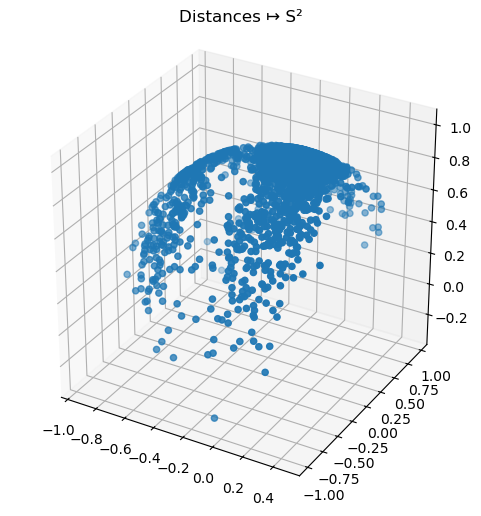

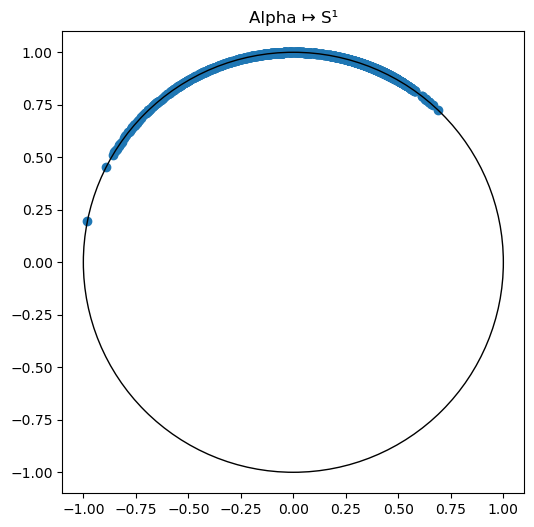

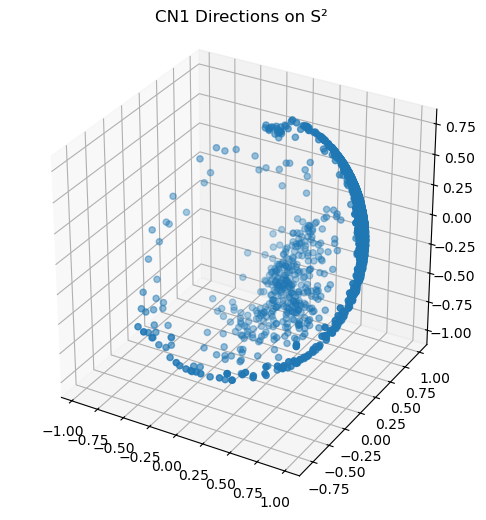

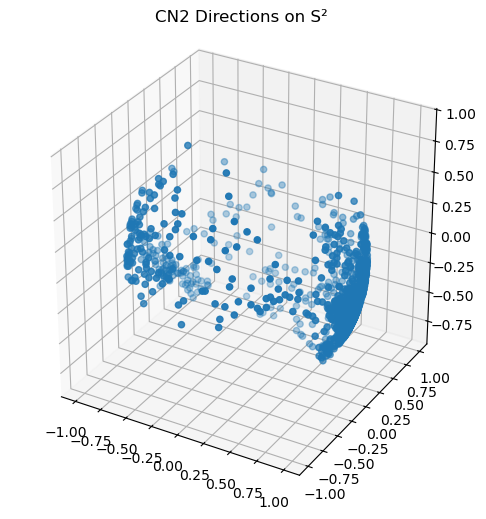

In [52]:
# --- Now plot each separately ---

# 1) Distances → S²
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S2_pts[:, 0], S2_pts[:, 1], S2_pts[:, 2])
ax.set_title('Distances ↦ S²')
ax.set_box_aspect([1, 1, 1])
plt.show()

# 2) Alpha ↦ S¹
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(S1_pts[:, 0], S1_pts[:, 1])
circle = Circle((0, 0), 1, fill=False)
ax.add_patch(circle)
ax.set_aspect('equal')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_title('Alpha ↦ S¹')
plt.show()

# 3) CN1 directions on S²
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S2_C1[:, 0], S2_C1[:, 1], S2_C1[:, 2])
ax.set_title('CN1 Directions on S²')
ax.set_box_aspect([1, 1, 1])
plt.show()

# 4) CN2 directions on S²
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S2_C2[:, 0], S2_C2[:, 1], S2_C2[:, 2])
ax.set_title('CN2 Directions on S²')
ax.set_box_aspect([1, 1, 1])
plt.show()


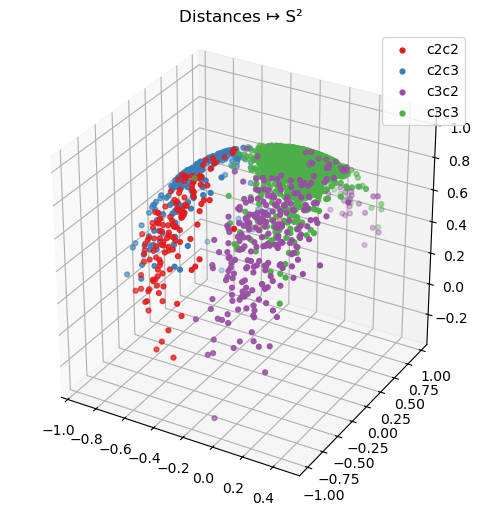

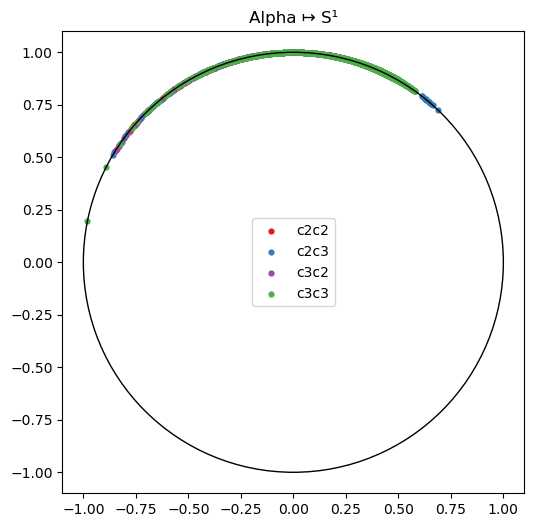

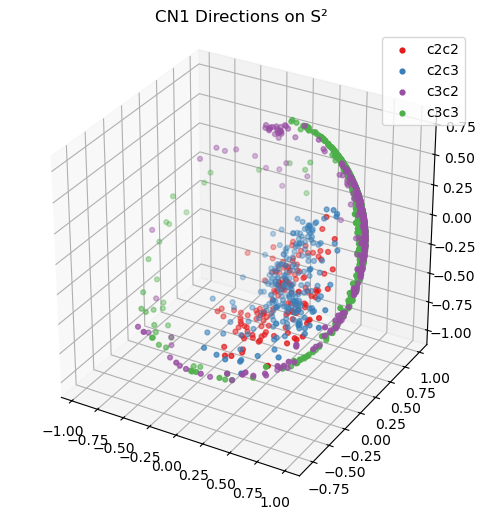

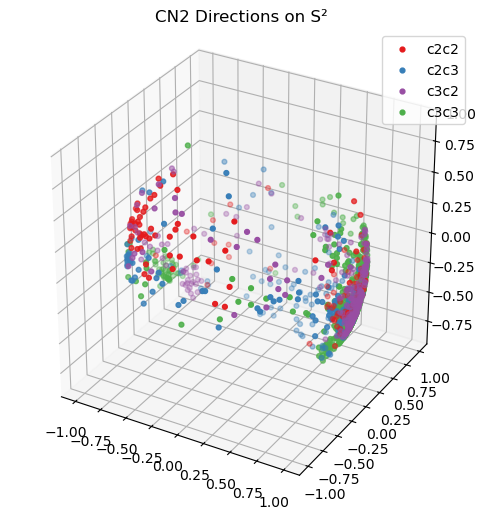

In [53]:
# ------------------------------------------------------------------
# 1-line helper: filter indices that are valid for a given point set
# ------------------------------------------------------------------
def valid(idxs, n_rows):
    """Return only those indices that exist in the target array."""
    return np.intersect1d(idxs, np.arange(n_rows))

# --------------------------------------------------------
# A consistent colour / label map that we’ll reuse everywhere
# --------------------------------------------------------
label_colour = {
    "c2c2": "#e41a1c",   # red
    "c2c3": "#377eb8",   # blue
    "c3c2": "#984ea3",   # purple
    "c3c3": "#4daf4a",   # green
}

# ------------------------------------------------------------------
# 2)  Helper: keep only those indices that exist in the target array
# ------------------------------------------------------------------
def valid(idxs, n_rows):
    idxs = np.asarray(idxs, dtype=np.intp)          # ensure int dtype
    return idxs[(idxs >= 0) & (idxs < n_rows)]

# ------------------------------------------------------------------
# 3)  Helper: one 3-D scatter with legend
# ------------------------------------------------------------------
def scatter3(ax, pts, title):
    for label, colour in label_colour.items():
        if label not in pucker_indices:             # skip if not present
            continue
        idxs = valid(pucker_indices[label], len(pts))
        ax.scatter(pts[idxs, 0], pts[idxs, 1], pts[idxs, 2],
                   s=12, color=colour, label=label)
    ax.set_title(title)
    ax.set_box_aspect([1, 1, 1])

# ------------------------------------------------------------------
# 4)  Figure 1 – Distances ↦ S²
# ------------------------------------------------------------------
fig = plt.figure(figsize=(6, 6))
scatter3(fig.add_subplot(111, projection="3d"), S2_pts, "Distances ↦ S²")
plt.legend(); plt.show()

# ------------------------------------------------------------------
# 5)  Figure 2 – Alpha ↦ S¹
# ------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 6))
for label, colour in label_colour.items():
    if label not in pucker_indices:
        continue
    idxs = valid(pucker_indices[label], len(S1_pts))
    ax.scatter(S1_pts[idxs, 0], S1_pts[idxs, 1],
               s=12, color=colour, label=label)

ax.add_patch(Circle((0, 0), 1, fill=False, lw=1))   # unit circle
ax.set_aspect("equal")
ax.set_xlim(-1.1, 1.1); ax.set_ylim(-1.1, 1.1)
ax.set_title("Alpha ↦ S¹")
ax.legend(); plt.show()

# ------------------------------------------------------------------
# 6)  Figure 3 – CN1 Directions on S²
# ------------------------------------------------------------------
fig = plt.figure(figsize=(6, 6))
scatter3(fig.add_subplot(111, projection="3d"), S2_C1, "CN1 Directions on S²")
plt.legend(); plt.show()

# ------------------------------------------------------------------
# 7)  Figure 4 – CN2 Directions on S²
# ------------------------------------------------------------------
fig = plt.figure(figsize=(6, 6))
scatter3(fig.add_subplot(111, projection="3d"), S2_C2, "CN2 Directions on S²")
plt.legend(); plt.show()


In [54]:
import plotly.graph_objects as go
from itertools import cycle

# Optional: if Plotly is not installed
# !pip install plotly

# Make sure every index array is an *integer* ndarray
pucker_indices = {k: np.asarray(v, dtype=np.intp) for k, v in pucker_indices.items()}

# Four fixed colours (feel free to swap in your favourites)
label_colour = {
    "c2c2": "#e41a1c",   # red
    "c2c3": "#377eb8",   # blue
    "c3c2": "#984ea3",   # purple
    "c3c3": "#4daf4a",   # green
}

# ──────────────────────────────────────────────────────────────────────────────
# 1)  Tiny helpers
# ──────────────────────────────────────────────────────────────────────────────
def valid(idxs, n_rows):
    """Return only those indices that exist in the target array."""
    idxs = np.asarray(idxs, dtype=np.intp)
    return idxs[(idxs >= 0) & (idxs < n_rows)]

def sphere_mesh(resolution=50, radius=1.0, opacity=0.15, colour="#cccccc"):
    """Return a semi-transparent spherical surface (for reference only)."""
    u, v = np.linspace(0, 2*np.pi, resolution), np.linspace(0, np.pi, resolution)
    u, v = np.meshgrid(u, v)
    x = radius * np.cos(u) * np.sin(v)
    y = radius * np.sin(u) * np.sin(v)
    z = radius * np.cos(v)
    return go.Surface(
        x=x, y=y, z=z,
        showscale=False,
        opacity=opacity,
        hoverinfo="skip",
        colorscale=[[0, colour], [1, colour]],
    )

def make_figure(pts, title, show_sphere=True):
    """Build an interactive 3-D scatter plot for one data set."""
    traces = []
    for label, colour in label_colour.items():
        if label not in pucker_indices:
            continue
        idxs = valid(pucker_indices[label], len(pts))
        traces.append(
            go.Scatter3d(
                x=pts[idxs, 0], y=pts[idxs, 1], z=pts[idxs, 2],
                mode="markers",
                marker=dict(size=4, color=colour),
                name=label,
            )
        )
    if show_sphere:
        traces.append(sphere_mesh())

    fig = go.Figure(data=traces)
    fig.update_layout(
        title=title,
        scene=dict(
            aspectmode="data",                # <- equal axis scaling
            xaxis=dict(showbackground=False),
            yaxis=dict(showbackground=False),
            zaxis=dict(showbackground=False),
        ),
        legend=dict(itemsizing="constant"),
        margin=dict(l=0, r=0, t=40, b=0)
    )
    return fig

# ──────────────────────────────────────────────────────────────────────────────
# 2)  Build & display the three interactive 3-D figures
# ──────────────────────────────────────────────────────────────────────────────
fig_distances = make_figure(S2_pts, "Distances ↦ S²")
fig_cn1       = make_figure(S2_C1,  "CN1 Directions on S²")
fig_cn2       = make_figure(S2_C2,  "CN2 Directions on S²")

# In a Jupyter / Colab / VS Code notebook this automatically opens an interactive widget:
fig_distances.show()
fig_cn1.show()
fig_cn2.show()

# (Optional) save to standalone HTML so you can share or open in any browser
fig_distances.write_html("distances_S2.html")
fig_cn1.write_html("CN1_S2.html")
fig_cn2.write_html("CN2_S2.html")
print("Saved interactive HTML files in the current directory.")


Saved interactive HTML files in the current directory.


In [10]:
from pnds.PNDS_geometry import full_RESHify

# -----------------------------------------------------------------------------
# Assume you've already computed `scaled_coords` (e.g. via scale_low_res_coords)
# -----------------------------------------------------------------------------
# Unpack into components
d2_s, d3_s, alpha_s, theta1, phi1, theta2, phi2 = scaled_coords.T
N = len(d2_s)

# -- 1) Exponential‐map of (d2,d3) to S² --
mean_dist_s = np.column_stack([d2_s, d3_s]).mean(axis=0)
t2d = np.column_stack([d2_s, d3_s]) - mean_dist_s            # (N,2)
V    = np.column_stack([t2d, np.zeros(N)])                   # (N,3)
r    = np.linalg.norm(V, axis=1)                             # geodesic radii
dirs = V / r[:, None]                                         # unit tangents
north = np.array([0, 0, 1])
S2_pts = np.cos(r)[:, None]*north + np.sin(r)[:, None]*dirs   # (N,3) on S²

# -- 2) Map α→S¹ --
alpha_rad = np.radians(alpha_s)
S1_pts = np.column_stack([np.cos(alpha_rad), np.sin(alpha_rad)])  # (N,2)

# -- 3+4) CN1 and CN2 (already on S²) --
S2_C1 = spherical_to_vec(theta1, phi1)  # (N,3)
S2_C2 = spherical_to_vec(theta2, phi2)  # (N,3)

# -- 5) Merge all into one HD sphere via RESHify --
spheres = [S2_pts, S1_pts, S2_C1, S2_C2]
# colors only used for plotting; pass dummy list
colors = [None] * len(spheres)

# full_RESHify returns: (merged_sphere, dimensions, rot_list, var_list)
merged_sphere, dimensions, rot_list, var_list = full_RESHify(spheres, colors)

print(f"Merged high-dim sphere shape: {merged_sphere.shape}")



Merged high-dim sphere shape: (4213, 8)


In [11]:
from pnds.PNDS_PNS import pns_loop

Dimension: 8 Mode: great
Dimension: 7 Mode: great
Dimension: 6 Mode: great
Dimension: 5 Mode: great
Dimension: 4 Mode: scale
chi2 in likelihood 0.0 mle [7.07455054 0.14029576] mle_null [0.50070601]
Dimension: 3 Mode: scale
chi2 in likelihood 0.0 mle [6.36678217 0.19724159] mle_null [0.75061729]


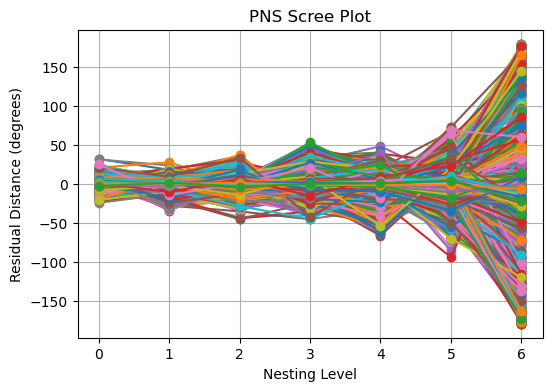

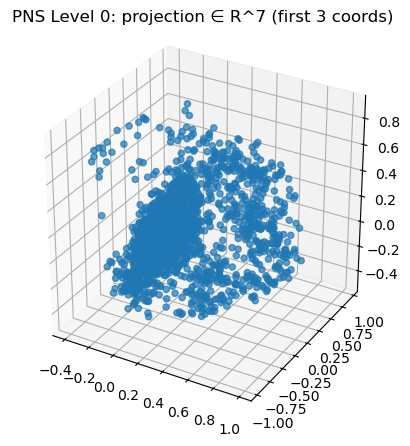

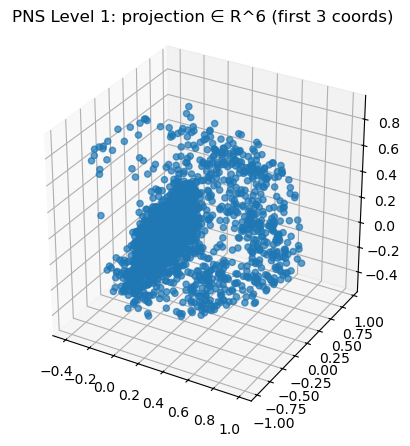

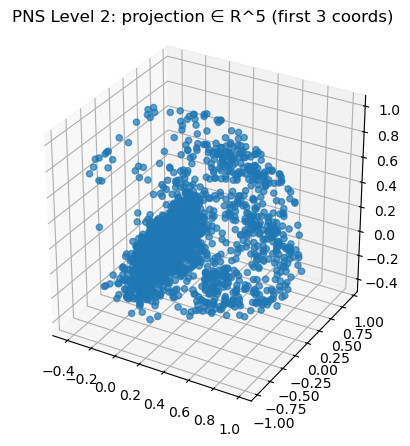

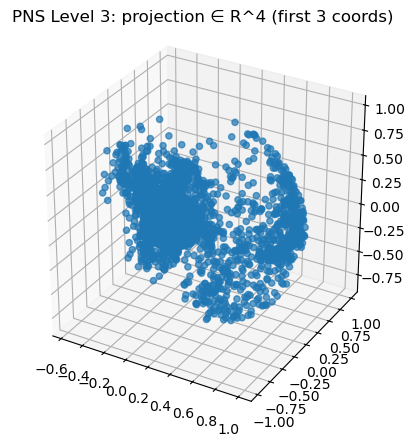

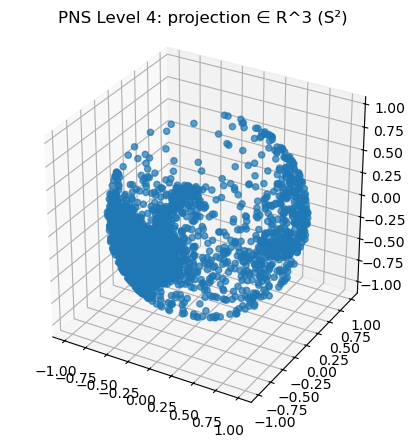

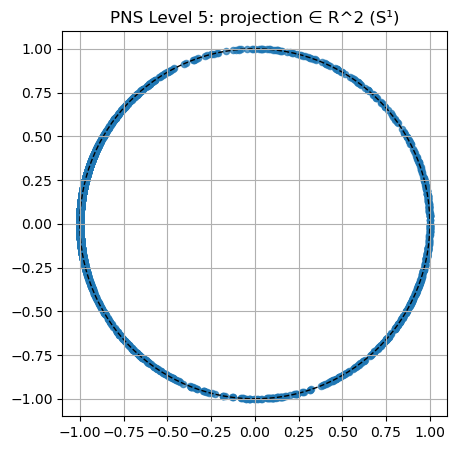

IndexError: tuple index out of range

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pnds.PNDS_PNS import pns_loop
from matplotlib.patches import Circle

# -----------------------------------------------------------------------------
# 1) Run PNS
# -----------------------------------------------------------------------------
spheres_pns, projected_points, distances = pns_loop(
    merged_sphere,
    great_until_dim=3,
    max_repetitions=10000,
    degenerate=False,
    verbose=False,
    mode='scale'
)

# -----------------------------------------------------------------------------
# 2) Scree plot of residual distances
# -----------------------------------------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(range(len(distances)), distances, marker='o')
plt.xlabel('Nesting Level')
plt.ylabel('Residual Distance (degrees)')
plt.title('PNS Scree Plot')
plt.grid(True)
plt.show()

# -----------------------------------------------------------------------------
# 3) Visualize projections on each nested sphere
# -----------------------------------------------------------------------------
for level, pts in enumerate(projected_points):
    dim = pts.shape[1]
    title = f"PNS Level {level}: projection ∈ R^{dim}"
    
    if dim == 3:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(pts[:,0], pts[:,1], pts[:,2], s=20, alpha=0.7)
        ax.set_title(title + " (S²)")
        ax.set_box_aspect((1,1,1))
        plt.show()
        
    elif dim == 2:
        fig, ax = plt.subplots(figsize=(5,5))
        ax.scatter(pts[:,0], pts[:,1], s=20, alpha=0.7)
        # draw unit circle for S¹
        circ = Circle((0,0), 1, fill=False, linestyle='--')
        ax.add_patch(circ)
        ax.set_aspect('equal', 'box')
        ax.set_xlim(-1.1,1.1)
        ax.set_ylim(-1.1,1.1)
        ax.set_title(title + " (S¹)")
        ax.grid(True)
        plt.show()
        
    else:
        # higher dims: project first 3 coords
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(pts[:,0], pts[:,1], pts[:,2], s=20, alpha=0.7)
        ax.set_title(title + " (first 3 coords)")
        ax.set_box_aspect((1,1,1))
        plt.show()


In [32]:
pts

array([-0.9996889 , -0.02494204])